In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Attention, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [27]:
# 文件路径列表
file_paths = [
    'C:\\Users\\mjy\\Desktop\\Project_MSCM\\INPUT_7.csv',
    'C:\\Users\\mjy\\Desktop\\Project_MSCM\\INPUT_15.csv',
    'C:\\Users\\mjy\\Desktop\\Project_MSCM\\INPUT_30.csv'
]

# 标签列名
label_columns = ['未来7日涨幅']
# 存储每个标签的准确率
accuracies = {label: [] for label in label_columns}

In [28]:
# 创建包含LSTM和CNN的模型
def create_cnn_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # CNN部分
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    # LSTM部分
    x = LSTM(64, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    
    # Attention mechanism
    attention = Attention()([x, x])
    x = Concatenate(axis=-1)([x, attention])
    
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [29]:
# 遍历每个数据集
for file_path in file_paths:
    print(f"Processing file: {file_path}")
    
    # 读取数据
    data = pd.read_csv(file_path)
    data = data.dropna()

    # 特征和标签
    features = data.iloc[:, 1:192]  # n1-n47, p1-p146
    labels = {label: (data[label] > 0).astype(int) for label in label_columns}

    # 标准化
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Reshape data for LSTM input
    features_scaled_reshaped = features_scaled.reshape((features_scaled.shape[0], features_scaled.shape[1], 1))

    # 定义回调函数
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # 对每个标签进行训练和评估
    for label_name, label_data in labels.items():
        print(f"Training for label: {label_name}")
        
        X_train, X_test, y_train, y_test = train_test_split(features_scaled_reshaped, label_data, test_size=0.2, random_state=42)

        # 创建改进后的模型
        model = create_cnn_lstm_model((features_scaled.shape[1], 1))

        # 训练模型
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

        # 预测并评估
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[label_name].append(accuracy)


Processing file: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv
Training for label: 未来7日涨幅

Epoch 1/100
17/17 [==============================] - 8s 100ms/step - loss: 0.6928 - accuracy: 0.5519 - val_loss: 0.6668 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 2/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6841 - accuracy: 0.5519 - val_loss: 0.6914 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 3/100
17/17 [==============================] - 1s 40ms/step - loss: 0.6709 - accuracy: 0.5833 - val_loss: 0.6555 - val_accuracy: 0.5956 - lr: 0.0010
Epoch 4/100
17/17 [==============================] - 1s 40ms/step - loss: 0.6767 - accuracy: 0.5759 - val_loss: 0.6765 - val_accuracy: 0.5662 - lr: 0.0010
Epoch 5/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6653 - accuracy: 0.6037 - val_loss: 0.6424 - val_accuracy: 0.6544 - lr: 0.0010
Epoch 6/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6460 - accuracy: 0.6130 - val_loss: 0.6532 - val_accuracy

In [30]:
# 输出所有文件的准确率
for label_name, accuracy_list in accuracies.items():
    for i, accuracy in enumerate(accuracy_list):
        print(f"File: {file_paths[i]}, Label: {label_name}, Accuracy: {accuracy:.4f}")

File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv, Label: 未来7日涨幅, Accuracy: 0.7515
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_15.csv, Label: 未来7日涨幅, Accuracy: 0.7619
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_30.csv, Label: 未来7日涨幅, Accuracy: 0.8242


In [31]:
# 存储每个标签的准确率
accuracies = {label: [] for label in label_columns}

def create_cnn_lstm_2(input_shape):
    inputs = Input(shape=input_shape)
    
    # CNN部分
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    # LSTM部分
    x = LSTM(64, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    
    # Attention mechanism
    attention = Attention()([x, x])
    x = Concatenate(axis=-1)([x, attention])
    
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [33]:
# 遍历每个数据集
for file_path in file_paths:
    print(f"Processing file: {file_path}")
    
    # 读取数据
    data = pd.read_csv(file_path)
    data = data.dropna()

    # 特征和标签
    features = data.iloc[:, 1:192]  # n1-n47, p1-p146
    labels = {label: (data[label] > 0).astype(int) for label in label_columns}

    # 标准化
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Reshape data for LSTM input
    features_scaled_reshaped = features_scaled.reshape((features_scaled.shape[0], features_scaled.shape[1], 1))

    # 定义回调函数
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # 对每个标签进行训练和评估
    for label_name, label_data in labels.items():
        print(f"Training for label: {label_name}")
        
        X_train, X_test, y_train, y_test = train_test_split(features_scaled_reshaped, label_data, test_size=0.2, random_state=42)

        # 创建改进后的模型
        model = create_cnn_lstm_2((features_scaled.shape[1], 1))

        # 训练模型
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

        # 预测并评估
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[label_name].append(accuracy)


Processing file: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv
Training for label: 未来7日涨幅
Epoch 1/100
17/17 [==============================] - 5s 102ms/step - loss: 0.6889 - accuracy: 0.5389 - val_loss: 0.6826 - val_accuracy: 0.6029 - lr: 0.0100
Epoch 2/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6891 - accuracy: 0.5389 - val_loss: 0.6796 - val_accuracy: 0.6029 - lr: 0.0100
Epoch 3/100
17/17 [==============================] - 1s 38ms/step - loss: 0.6866 - accuracy: 0.5463 - val_loss: 0.6766 - val_accuracy: 0.6029 - lr: 0.0100
Epoch 4/100
17/17 [==============================] - 1s 38ms/step - loss: 0.6850 - accuracy: 0.5444 - val_loss: 0.6740 - val_accuracy: 0.6029 - lr: 0.0100
Epoch 5/100
17/17 [==============================] - 1s 42ms/step - loss: 0.6881 - accuracy: 0.5444 - val_loss: 0.6748 - val_accuracy: 0.6029 - lr: 0.0100
Epoch 6/100
17/17 [==============================] - 1s 40ms/step - loss: 0.6816 - accuracy: 0.5463 - val_loss: 0.6739 - val_accuracy:

In [34]:
# 输出所有文件的准确率
for label_name, accuracy_list in accuracies.items():
    for i, accuracy in enumerate(accuracy_list):
        print(f"File: {file_paths[i]}, Label: {label_name}, Accuracy: {accuracy:.4f}")

File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv, Label: 未来7日涨幅, Accuracy: 0.6036
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_15.csv, Label: 未来7日涨幅, Accuracy: 0.6250
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_30.csv, Label: 未来7日涨幅, Accuracy: 0.6303


In [35]:
# 存储每个标签的准确率
accuracies = {label: [] for label in label_columns}

def create_cnn_lstm_3(input_shape):
    inputs = Input(shape=input_shape)
    
    # CNN部分
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    # LSTM部分
    x = LSTM(64, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    
    # Attention mechanism
    attention = Attention()([x, x])
    x = Concatenate(axis=-1)([x, attention])
    
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [36]:
# 遍历每个数据集
for file_path in file_paths:
    print(f"Processing file: {file_path}")
    
    # 读取数据
    data = pd.read_csv(file_path)
    data = data.dropna()

    # 特征和标签
    features = data.iloc[:, 1:192]  # n1-n47, p1-p146
    labels = {label: (data[label] > 0).astype(int) for label in label_columns}

    # 标准化
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Reshape data for LSTM input
    features_scaled_reshaped = features_scaled.reshape((features_scaled.shape[0], features_scaled.shape[1], 1))

    # 定义回调函数
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # 对每个标签进行训练和评估
    for label_name, label_data in labels.items():
        print(f"Training for label: {label_name}")
        
        X_train, X_test, y_train, y_test = train_test_split(features_scaled_reshaped, label_data, test_size=0.2, random_state=42)

        # 创建改进后的模型
        model = create_cnn_lstm_3((features_scaled.shape[1], 1))

        # 训练模型
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

        # 预测并评估
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[label_name].append(accuracy)


Processing file: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv
Training for label: 未来7日涨幅
Epoch 1/100
17/17 [==============================] - 5s 98ms/step - loss: 0.7026 - accuracy: 0.5426 - val_loss: 0.6650 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 2/100
17/17 [==============================] - 1s 39ms/step - loss: 0.7020 - accuracy: 0.5241 - val_loss: 0.6691 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 3/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6803 - accuracy: 0.5796 - val_loss: 0.6881 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 4/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6683 - accuracy: 0.5963 - val_loss: 0.6376 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 5/100
17/17 [==============================] - 1s 40ms/step - loss: 0.6666 - accuracy: 0.6185 - val_loss: 0.7069 - val_accuracy: 0.5368 - lr: 0.0010
Epoch 6/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6545 - accuracy: 0.6278 - val_loss: 0.6514 - val_accuracy: 

In [37]:
# 输出所有文件的准确率
for label_name, accuracy_list in accuracies.items():
    for i, accuracy in enumerate(accuracy_list):
        print(f"File: {file_paths[i]}, Label: {label_name}, Accuracy: {accuracy:.4f}")

File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv, Label: 未来7日涨幅, Accuracy: 0.6509
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_15.csv, Label: 未来7日涨幅, Accuracy: 0.7679
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_30.csv, Label: 未来7日涨幅, Accuracy: 0.7818


In [38]:
# 存储每个标签的准确率
accuracies = {label: [] for label in label_columns}

def create_cnn_lstm_4(input_shape):
    inputs = Input(shape=input_shape)
    
    # CNN部分
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    # LSTM部分
    x = LSTM(64, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    
    # Attention mechanism
    attention = Attention()([x, x])
    x = Concatenate(axis=-1)([x, attention])
    
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [39]:
# 遍历每个数据集
for file_path in file_paths:
    print(f"Processing file: {file_path}")
    
    # 读取数据
    data = pd.read_csv(file_path)
    data = data.dropna()

    # 特征和标签
    features = data.iloc[:, 1:192]  # n1-n47, p1-p146
    labels = {label: (data[label] > 0).astype(int) for label in label_columns}

    # 标准化
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Reshape data for LSTM input
    features_scaled_reshaped = features_scaled.reshape((features_scaled.shape[0], features_scaled.shape[1], 1))

    # 定义回调函数
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # 对每个标签进行训练和评估
    for label_name, label_data in labels.items():
        print(f"Training for label: {label_name}")
        
        X_train, X_test, y_train, y_test = train_test_split(features_scaled_reshaped, label_data, test_size=0.2, random_state=42)

        # 创建改进后的模型
        model = create_cnn_lstm_4((features_scaled.shape[1], 1))

        # 训练模型
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

        # 预测并评估
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[label_name].append(accuracy)


Processing file: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv
Training for label: 未来7日涨幅
Epoch 1/100
17/17 [==============================] - 8s 99ms/step - loss: 0.6946 - accuracy: 0.4833 - val_loss: 0.6914 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 2/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6933 - accuracy: 0.4907 - val_loss: 0.6887 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 3/100
17/17 [==============================] - 1s 40ms/step - loss: 0.6919 - accuracy: 0.5167 - val_loss: 0.6875 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 4/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6906 - accuracy: 0.5426 - val_loss: 0.6859 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 5/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6901 - accuracy: 0.5407 - val_loss: 0.6847 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 6/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6877 - accuracy: 0.5611 - val_loss: 0.6836 - val_accuracy: 

In [40]:
# 输出所有文件的准确率
for label_name, accuracy_list in accuracies.items():
    for i, accuracy in enumerate(accuracy_list):
        print(f"File: {file_paths[i]}, Label: {label_name}, Accuracy: {accuracy:.4f}")

File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv, Label: 未来7日涨幅, Accuracy: 0.5325
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_15.csv, Label: 未来7日涨幅, Accuracy: 0.5774
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_30.csv, Label: 未来7日涨幅, Accuracy: 0.6121


In [41]:
# 存储每个标签的准确率
accuracies = {label: [] for label in label_columns}

def create_cnn_lstm_5(input_shape):
    inputs = Input(shape=input_shape)
    
    # CNN部分
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    # LSTM部分
    x = LSTM(64, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    
    # Attention mechanism
    attention = Attention()([x, x])
    x = Concatenate(axis=-1)([x, attention])
    
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [42]:
# 遍历每个数据集
for file_path in file_paths:
    print(f"Processing file: {file_path}")
    
    # 读取数据
    data = pd.read_csv(file_path)
    data = data.dropna()

    # 特征和标签
    features = data.iloc[:, 1:192]  # n1-n47, p1-p146
    labels = {label: (data[label] > 0).astype(int) for label in label_columns}

    # 标准化
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Reshape data for LSTM input
    features_scaled_reshaped = features_scaled.reshape((features_scaled.shape[0], features_scaled.shape[1], 1))

    # 定义回调函数
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # 对每个标签进行训练和评估
    for label_name, label_data in labels.items():
        print(f"Training for label: {label_name}")
        
        X_train, X_test, y_train, y_test = train_test_split(features_scaled_reshaped, label_data, test_size=0.2, random_state=42)

        # 创建改进后的模型
        model = create_cnn_lstm_5((features_scaled.shape[1], 1))

        # 训练模型
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

        # 预测并评估
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[label_name].append(accuracy)


Processing file: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv
Training for label: 未来7日涨幅
Epoch 1/100
17/17 [==============================] - 6s 108ms/step - loss: 0.6970 - accuracy: 0.5204 - val_loss: 0.6818 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/100
17/17 [==============================] - 1s 43ms/step - loss: 0.6792 - accuracy: 0.5685 - val_loss: 0.6681 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 3/100
17/17 [==============================] - 1s 43ms/step - loss: 0.6902 - accuracy: 0.5296 - val_loss: 0.6699 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 4/100
17/17 [==============================] - 1s 42ms/step - loss: 0.6837 - accuracy: 0.5759 - val_loss: 0.6702 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 5/100
17/17 [==============================] - 1s 40ms/step - loss: 0.6761 - accuracy: 0.5889 - val_loss: 0.6630 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 6/100
17/17 [==============================] - 1s 42ms/step - loss: 0.6763 - accuracy: 0.5759 - val_loss: 0.6533 - val_accuracy:

In [43]:
# 输出所有文件的准确率
for label_name, accuracy_list in accuracies.items():
    for i, accuracy in enumerate(accuracy_list):
        print(f"File: {file_paths[i]}, Label: {label_name}, Accuracy: {accuracy:.4f}")

File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv, Label: 未来7日涨幅, Accuracy: 0.6509
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_15.csv, Label: 未来7日涨幅, Accuracy: 0.7798
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_30.csv, Label: 未来7日涨幅, Accuracy: 0.8000


In [44]:
# 存储每个标签的准确率
accuracies = {label: [] for label in label_columns}

def create_cnn_lstm_6(input_shape):
    inputs = Input(shape=input_shape)
    
    # CNN部分
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
    # LSTM部分
    x = LSTM(64, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    
    # Attention mechanism
    attention = Attention()([x, x])
    x = Concatenate(axis=-1)([x, attention])
    
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [45]:
# 遍历每个数据集
for file_path in file_paths:
    print(f"Processing file: {file_path}")
    
    # 读取数据
    data = pd.read_csv(file_path)
    data = data.dropna()

    # 特征和标签
    features = data.iloc[:, 1:192]  # n1-n47, p1-p146
    labels = {label: (data[label] > 0).astype(int) for label in label_columns}

    # 标准化
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Reshape data for LSTM input
    features_scaled_reshaped = features_scaled.reshape((features_scaled.shape[0], features_scaled.shape[1], 1))

    # 定义回调函数
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # 对每个标签进行训练和评估
    for label_name, label_data in labels.items():
        print(f"Training for label: {label_name}")
        
        X_train, X_test, y_train, y_test = train_test_split(features_scaled_reshaped, label_data, test_size=0.2, random_state=42)

        # 创建改进后的模型
        model = create_cnn_lstm_6((features_scaled.shape[1], 1))

        # 训练模型
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

        # 预测并评估
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[label_name].append(accuracy)


Processing file: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv
Training for label: 未来7日涨幅
Epoch 1/100
17/17 [==============================] - 7s 101ms/step - loss: 0.6923 - accuracy: 0.5370 - val_loss: 0.6676 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 2/100
17/17 [==============================] - 1s 40ms/step - loss: 0.6823 - accuracy: 0.5519 - val_loss: 0.6598 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 3/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6769 - accuracy: 0.5574 - val_loss: 0.6738 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 4/100
17/17 [==============================] - 1s 40ms/step - loss: 0.6681 - accuracy: 0.5574 - val_loss: 0.6514 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 5/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6737 - accuracy: 0.5815 - val_loss: 0.6520 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 6/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6416 - accuracy: 0.6370 - val_loss: 0.6887 - val_accuracy:

In [46]:
# 输出所有文件的准确率
for label_name, accuracy_list in accuracies.items():
    for i, accuracy in enumerate(accuracy_list):
        print(f"File: {file_paths[i]}, Label: {label_name}, Accuracy: {accuracy:.4f}")

File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_7.csv, Label: 未来7日涨幅, Accuracy: 0.6627
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_15.csv, Label: 未来7日涨幅, Accuracy: 0.7738
File: C:\Users\mjy\Desktop\Project_MSCM\INPUT_30.csv, Label: 未来7日涨幅, Accuracy: 0.8061


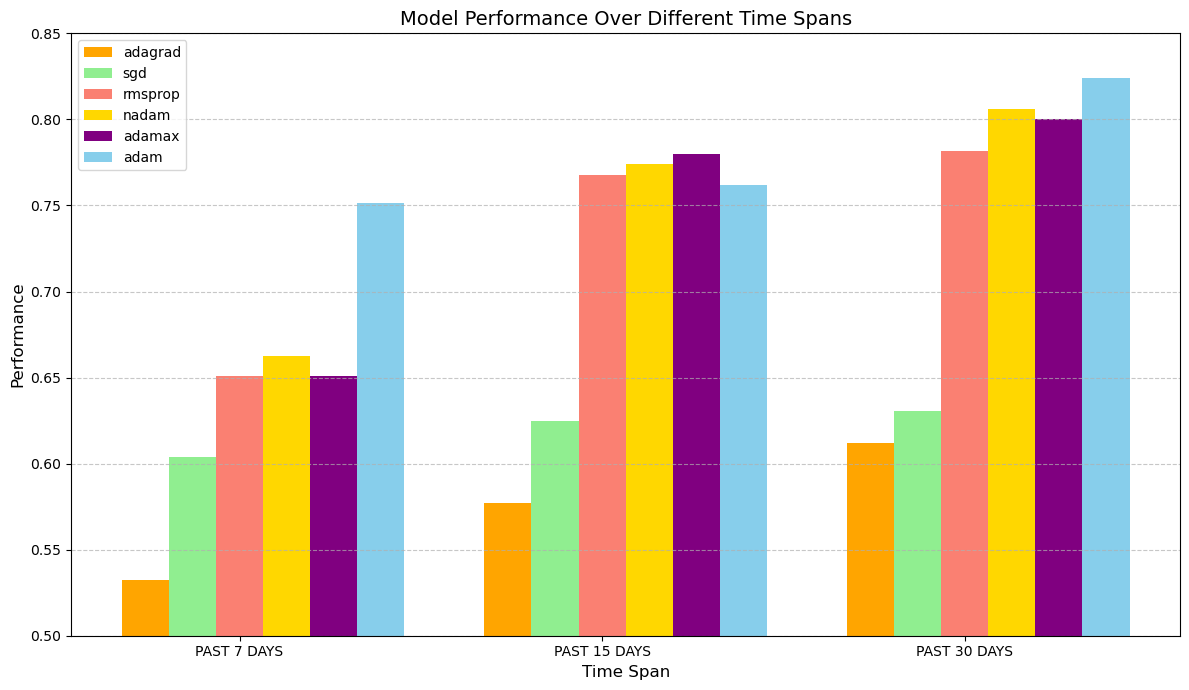

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ['PAST 7 DAYS', 'PAST 15 DAYS', 'PAST 30 DAYS']
adagrad = [0.5325, 0.5774, 0.6121]
sgd = [0.6036, 0.6250, 0.6303]
rmsprop = [0.6509, 0.7679, 0.7818]
nadam = [0.6627, 0.7738, 0.8061]
adamax = [0.6509, 0.7798, 0.8000]
adam = [0.7515, 0.7619, 0.8242]

# 设置柱状图的位置
x = np.arange(len(categories))
width = 0.13

# 创建图形和轴
fig, ax = plt.subplots(figsize=(12, 7))

# 绘制每种优化器的柱状图
ax.bar(x - 2*width, adagrad, width, label='adagrad', color='orange')
ax.bar(x - width, sgd, width, label='sgd', color='lightgreen')
ax.bar(x, rmsprop, width, label='rmsprop', color='salmon')
ax.bar(x + width, nadam, width, label='nadam', color='gold')
ax.bar(x + 2*width, adamax, width, label='adamax', color='purple')
ax.bar(x + 3*width, adam, width, label='adam', color='skyblue')

# 添加标签和标题
ax.set_xlabel('Time Span', fontsize=12)
ax.set_ylabel('Performance', fontsize=12)
ax.set_title('Model Performance Over Different Time Spans', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=10)
ax.legend()

# 调整y轴范围
ax.set_ylim(0.5, 0.85)

# 显示网格
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.tight_layout()
plt.show()